In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing dataset
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data.set_index('ID',inplace=True)
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [6]:
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


In [8]:
data.duplicated()

ID
1       False
2       False
3       False
4       False
5       False
        ...  
4017    False
4018    False
4019    False
4020    False
4021    False
Length: 3999, dtype: bool

In [9]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [10]:
data1 = data.drop_duplicates(keep=False, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3997 non-null   int64
 1   Qual_miles         3997 non-null   int64
 2   cc1_miles          3997 non-null   int64
 3   cc2_miles          3997 non-null   int64
 4   cc3_miles          3997 non-null   int64
 5   Bonus_miles        3997 non-null   int64
 6   Bonus_trans        3997 non-null   int64
 7   Flight_miles_12mo  3997 non-null   int64
 8   Flight_trans_12    3997 non-null   int64
 9   Days_since_enroll  3997 non-null   int64
 10  Award              3997 non-null   int64
dtypes: int64(11)
memory usage: 374.7 KB


In [11]:
data1

## Exploratory Data Analysis

In [12]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

Balance


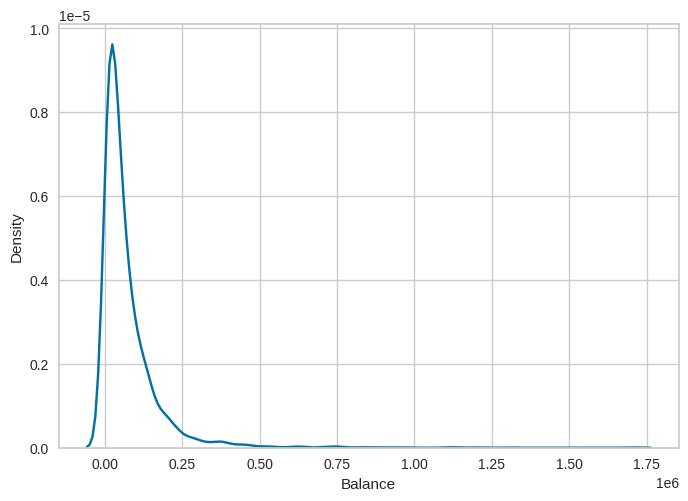

Qual_miles


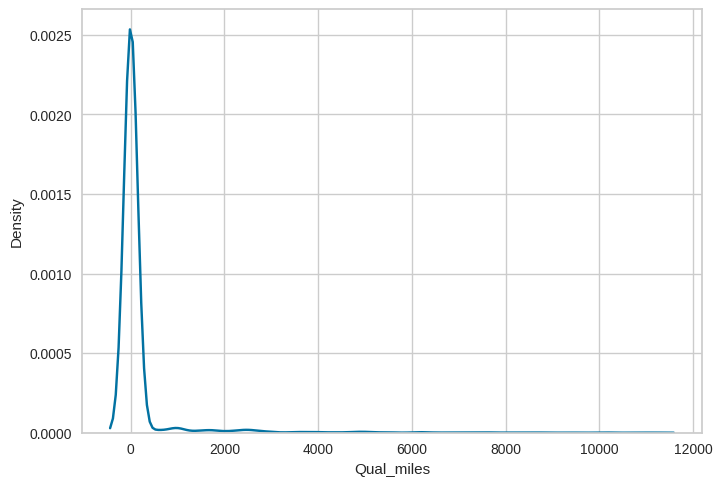

cc1_miles


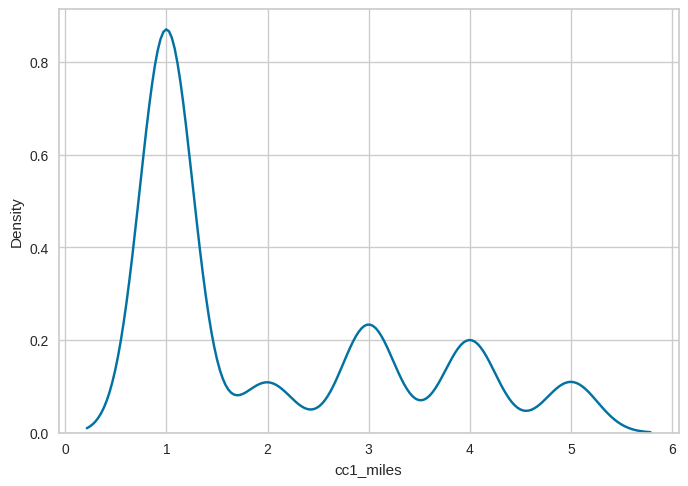

cc2_miles


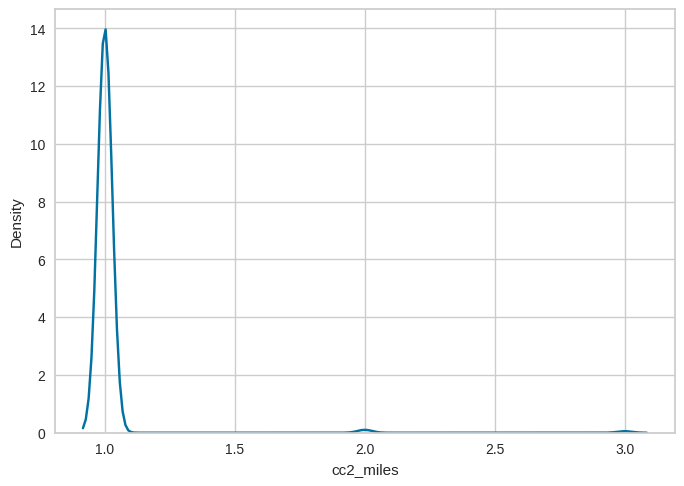

cc3_miles


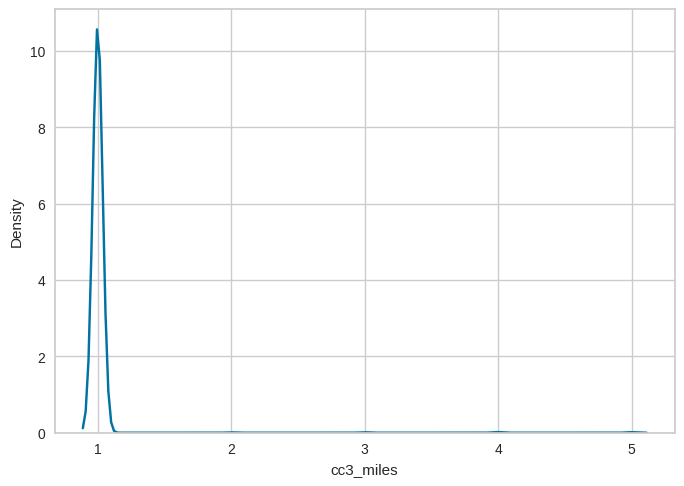

Bonus_miles


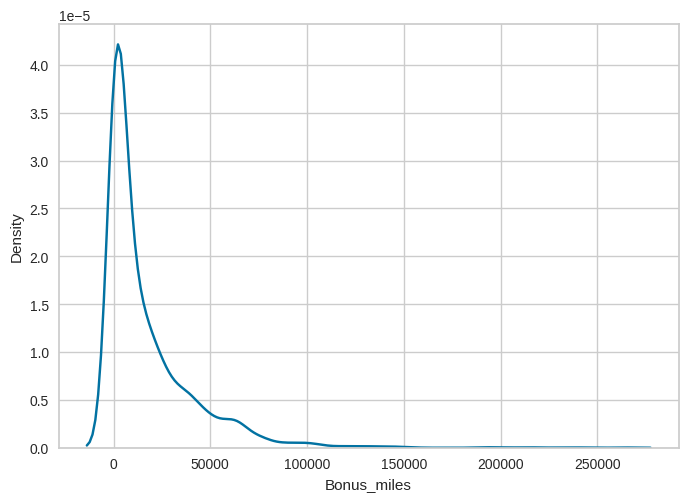

Bonus_trans


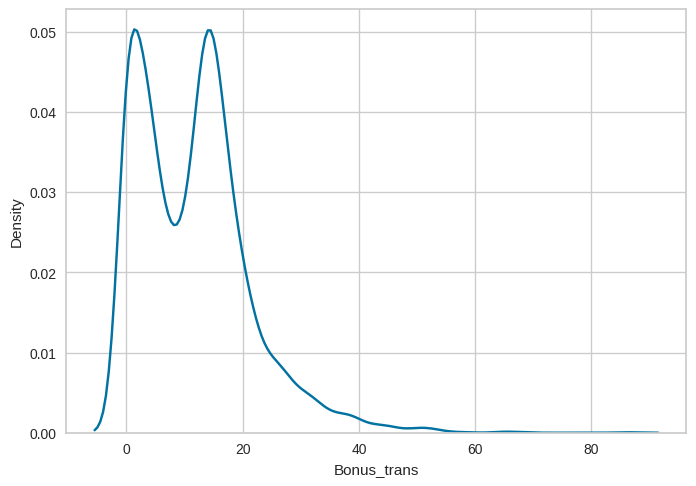

Flight_miles_12mo


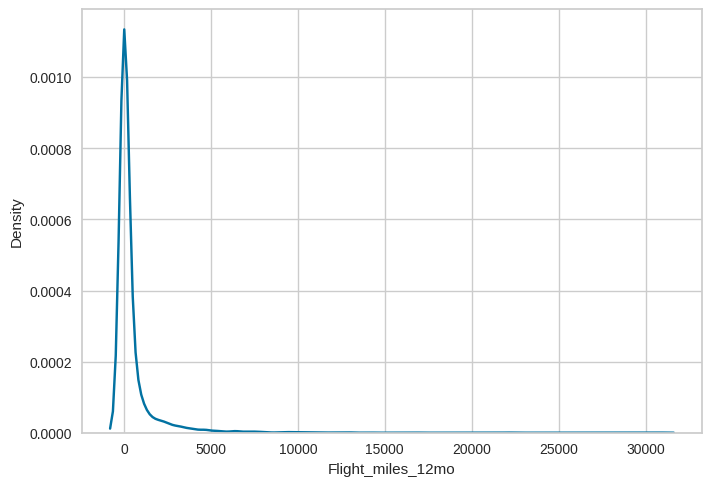

Flight_trans_12


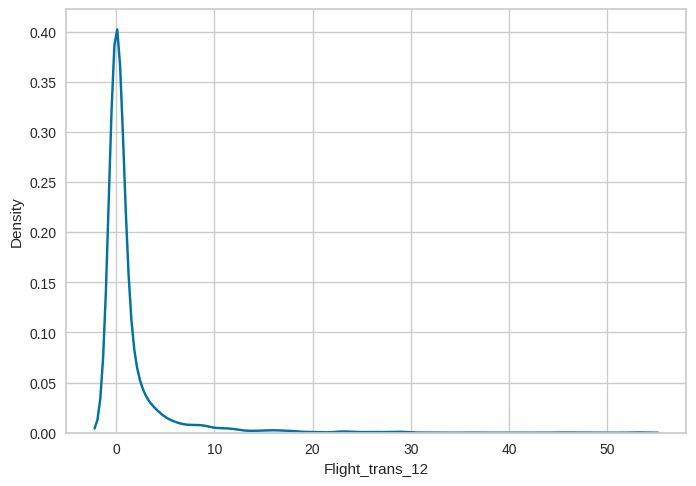

Days_since_enroll


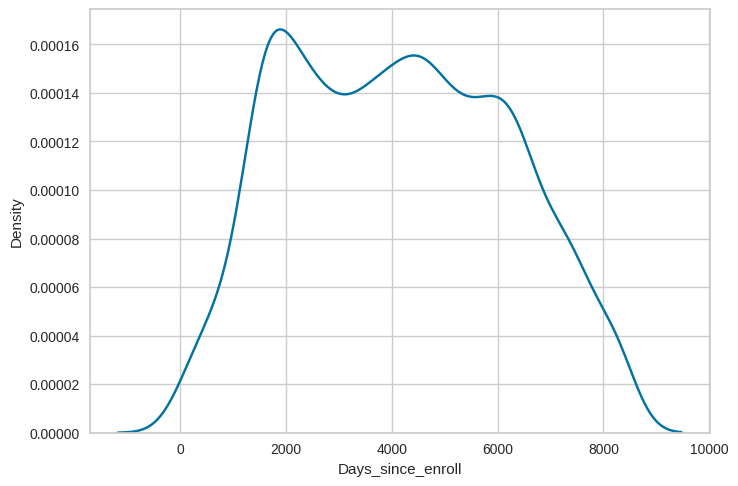

Award


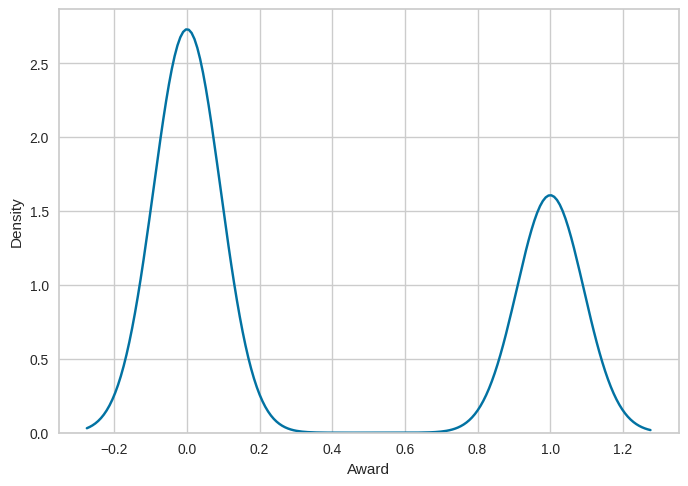

In [13]:
for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

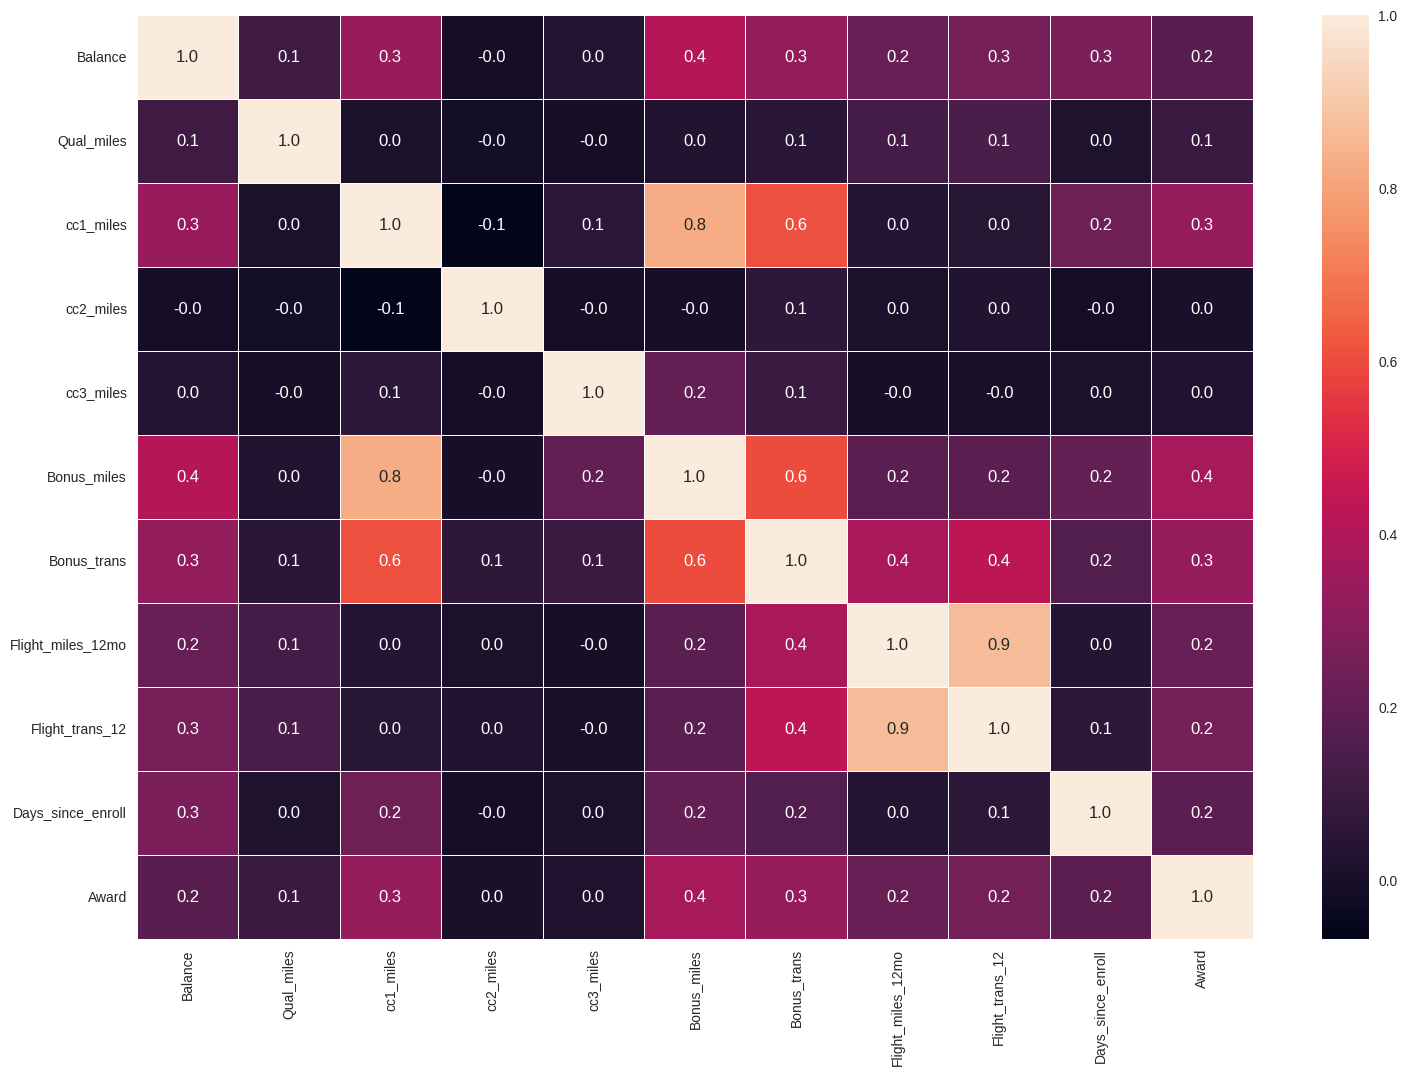

In [14]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

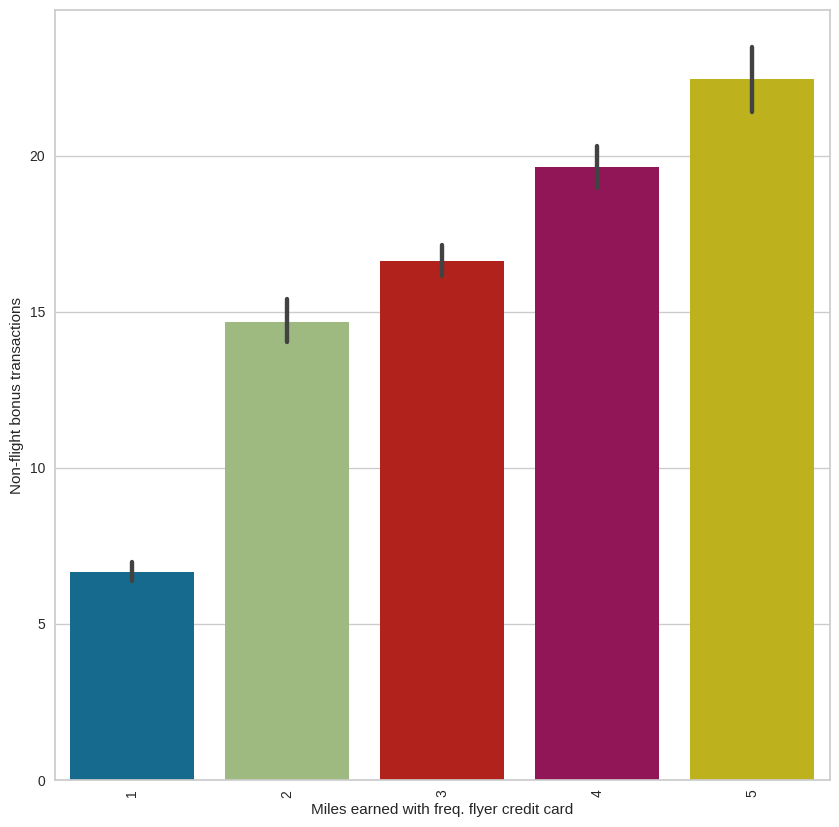

In [15]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

In [16]:
#Standardizing the Data
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3997, 11)

In [17]:
#Normalizing the data
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3997, 11)

## KMeans 

In [18]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,43967.000000
1,2,35395.180292
2,3,30886.976673
3,4,27439.984092
4,5,23698.199467
5,6,21084.761858
6,7,18885.655387
7,8,17697.697821
8,9,15960.668357
9,10,14728.619260


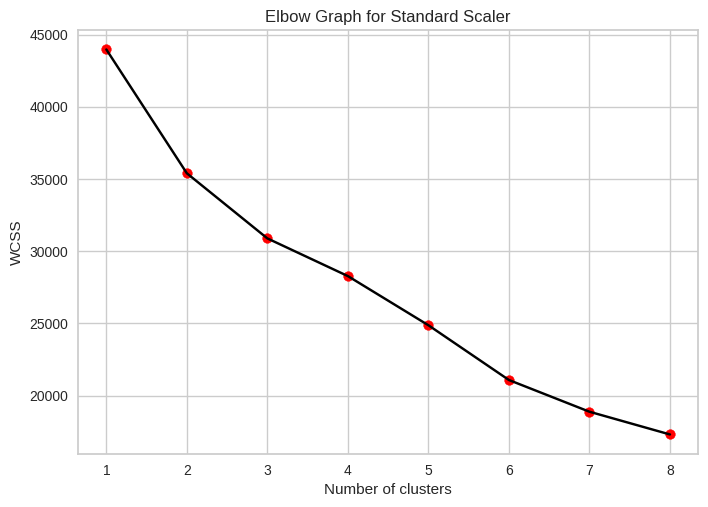

In [19]:
# within-cluster sum-of-squares criterion 
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Silhouette Score

In [20]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

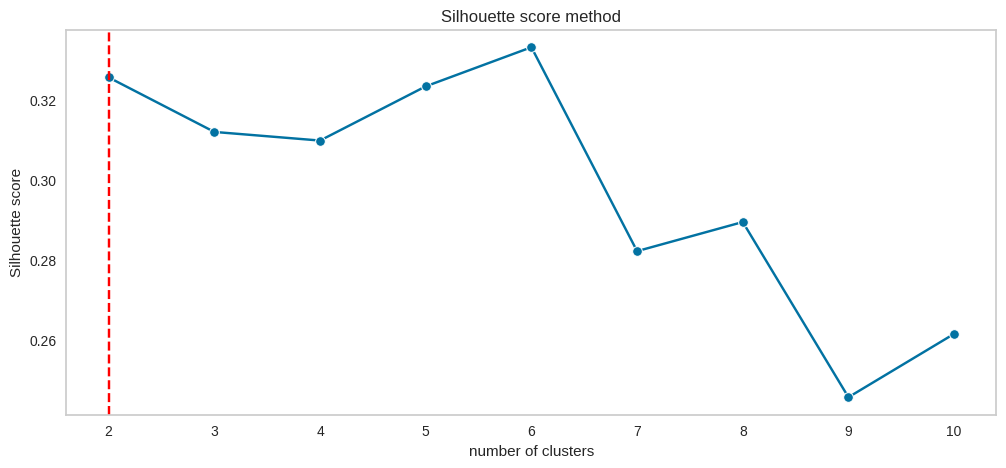

In [21]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(data = std_df,x= n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

In [22]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3997,)

In [23]:
# these are nothing but cluster labels...

y_predict_kmeans

array([2, 2, 2, ..., 5, 1, 1], dtype=int32)

In [24]:
model_kmeans.labels_

array([2, 2, 2, ..., 5, 1, 1], dtype=int32)

In [25]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 6.39281866e-01, -8.45057367e-02,  1.02159519e+00,
        -9.82667002e-02,  1.56423703e+01,  3.17894186e+00,
         1.71420669e+00,  3.31208759e-02,  5.95012409e-02,
         2.39291027e-01,  3.37108890e-01],
       [-3.67570714e-01, -5.86638778e-02, -5.76705537e-01,
        -9.82667002e-02, -6.27823432e-02, -5.11415766e-01,
        -5.06888285e-01, -2.07947256e-01, -2.27418213e-01,
        -9.17212537e-01, -4.70011999e-01],
       [-1.32776259e-01, -3.86188339e-02, -4.98797665e-01,
        -9.82667002e-02, -5.85811574e-02, -4.55576452e-01,
        -3.51051930e-01, -1.46193510e-01, -1.51644057e-01,
         7.86100683e-01, -1.52321687e-01],
       [-4.72445114e-02, -1.56291079e-01, -6.68544203e-01,
         9.03596587e+00, -6.27823432e-02, -1.02007939e-01,
         6.17317712e-01,  8.73654797e-02,  2.20117751e-01,
        -7.30840190e-02,  5.13948435e-02],
       [ 1.16855466e+00,  8.60251050e-01,  9.97346466e-02,
        -9.82667002e-02, -6.27823432e-02,  6.29585161e-01,
  

In [26]:
data2 = data.copy()
#data2 = data1
data2['Kmeans_label'] = model_kmeans.labels_
data2.groupby('Kmeans_label').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,
0,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
1,36615.170184,98.862491,1.266167,1.000000,1.000000,4805.521443,6.745405,169.202859,0.511913,2224.582029,0.143635
2,60214.206557,114.211475,1.372951,1.000000,1.000820,6145.782787,8.230328,255.354918,0.798361,5741.795902,0.296721
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,191398.960526,809.809211,2.197368,1.000000,1.000000,32358.500000,27.375000,5576.815789,16.230263,4694.269737,0.815789
5,121088.739526,151.615665,3.883424,1.000000,1.001821,42846.995446,19.225865,363.699454,1.075592,4772.879781,0.691257


In [30]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

Elbow Method and Silhouette Score on MinMaxScaler Applied **Data** **bold text**

In [31]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,1830.142671
1,2,823.440933
2,3,625.034881
3,4,436.575250
4,5,348.926268
5,6,315.134380
6,7,287.713601
7,8,263.197139
8,9,243.902350
9,10,226.099699


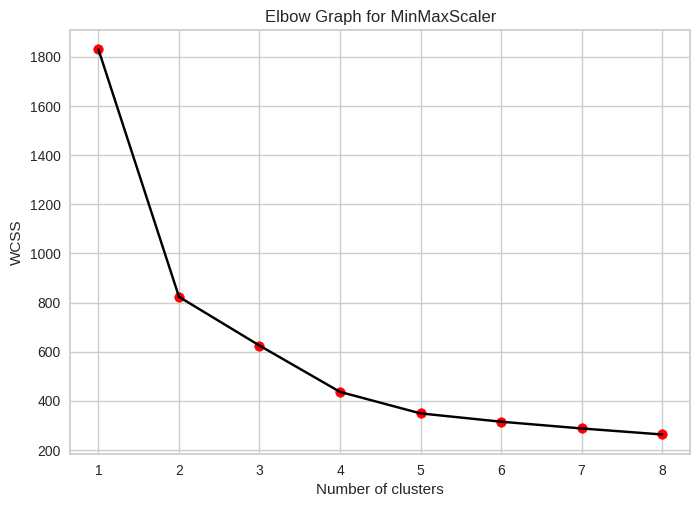

In [32]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

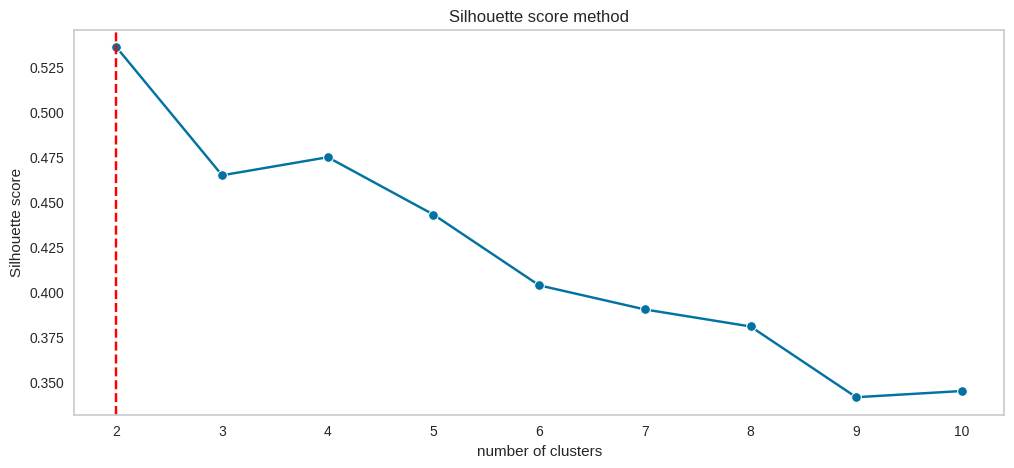

In [34]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(minmax_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(data = std_df,x= n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()


Elbow Plot for MinMaxScaler data


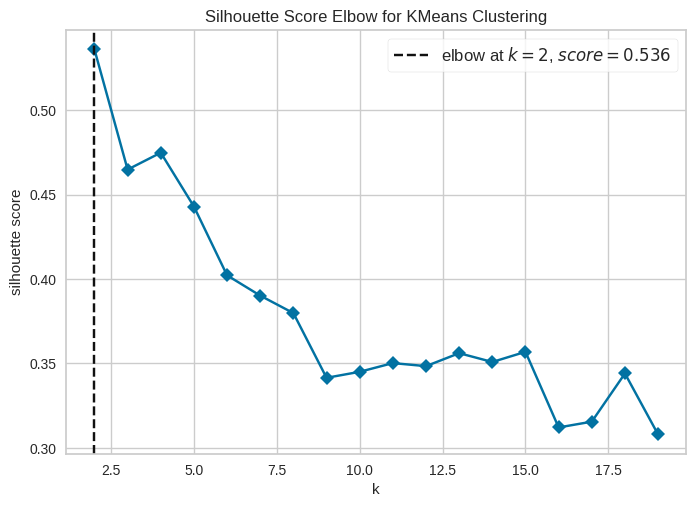

In [35]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)    
visualizer.poof()
plt.show()

In [36]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.5358466148086706
For n_clusters = 3 The average silhouette_score is : 0.4647544320834145
For n_clusters = 4 The average silhouette_score is : 0.4747529764917658
For n_clusters = 5 The average silhouette_score is : 0.442890405520313
For n_clusters = 6 The average silhouette_score is : 0.40114339299291163
For n_clusters = 7 The average silhouette_score is : 0.3907572263146666
For n_clusters = 8 The average silhouette_score is : 0.3807028172398457
For n_clusters = 9 The average silhouette_score is : 0.3843876502609504


In [37]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3997,)

In [38]:
# these are nothing but cluster labels...

y_predict_kmeans

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [39]:
model_kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [40]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 0.58672996,  0.14657669,  1.12578947, -0.03070331,  0.12587443,
         1.00447064,  0.91346654,  0.36211594,  0.40306059,  0.39713814,
         0.69953435],
       [-0.28378216, -0.07089437, -0.54450767,  0.01485019, -0.06088136,
        -0.48582971, -0.441814  , -0.17514368, -0.19494727, -0.19208278,
        -0.33834197]])

In [41]:
data3 = data.copy()
#data2 = data1
data3['Kmeans_label'] = model_kmeans.labels_
data3.groupby('Kmeans_label').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,
0,132760.658986,257.798771,3.610599,1.009985,1.036866,41429.117512,20.380952,967.233487,2.902458,4942.417819,0.708909
1,45074.334323,89.298701,1.310946,1.016698,1.000371,5425.428200,7.369202,215.371058,0.635993,3722.410761,0.207050


Elbow Method and Silhouette Score on MinMaxScaler Applied **Data** **bold text**

In [44]:
cluster_range = range(1,3)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,1830.142671
1,2,823.440933


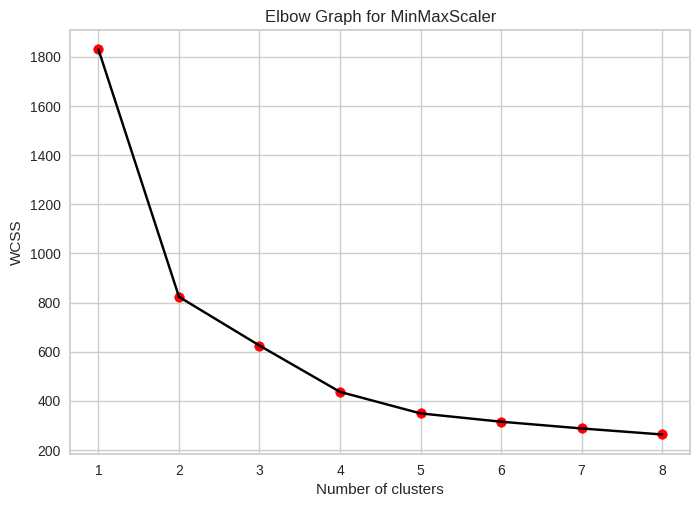

In [45]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Hierarchical Clustering Algorithm

In [48]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5358466148086706
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4703223519788196
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4703223519788196
For n_clusters = 2 The average silhouette_score with linkage- single : 0.5358466148086706

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4354030704229077
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5317942176403236
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39609020522670846
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5350765620408813

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42484070340085706
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4644932393768471
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5285173030807998
For

# Dendrogram on Standard Scaler Applied on Data

In [49]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2368355830608093
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8110617987175284
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8110617987175284
For n_clusters = 2 The average silhouette_score with linkage- single : 0.85624246038558

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.24768860572547674
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760160485250561
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838180741206467
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7349731612813738

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.2583110044577035
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5984856641830097
For n_clusters = 4 The average silhouette_score with linkage- average : 0.773045038880603
For n_c

# PCA

In [50]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [51]:
print(pca_std.singular_values_)

[114.57537749  83.11245047  64.93089202  63.51433156  61.95169794
  60.3900775   56.79270016  49.81159349  37.95056897]


In [52]:
print(pca_std.explained_variance_ratio_*100)

[29.85765944 15.71105471  9.58905711  9.17522304  8.72930352  8.29476985
  7.33598106  5.64331168  3.27574245]


In [53]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([29.85765944, 45.56871415, 55.15777126, 64.3329943 , 73.06229782,
       81.35706767, 88.69304873, 94.33636041, 97.61210286])

# Silhouette Score method for PCA Standard Scaled Data

In [54]:
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.19947934052749408
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8108361663122261
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8108361663122261
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7382702132013285

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.21091446771295347
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7783662995096002
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7857680202829526
For n_clusters = 3 The average silhouette_score with linkage- single : 0.737992651358616

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.2148357374281485
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6684939354840511
For n_clusters = 4 The average silhouette_score with linkage- average : 0.775409753839648
For n

# Run Hierarchical Clustering.(Agglomerative Clustering)

In [58]:
agg_clustering=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3997,)


array([0, 0, 0, ..., 0, 0, 0])

In [59]:
# Cluster numbers

agg_clustering.n_clusters_

3

In [60]:
# Clustering Score

(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

77.837

Putting Cluster lables into original dataset And analysis of the **same**

In [62]:
# Concating Labels with main dataset copy

data['Hierarchical_labels'] = agg_clustering.labels_
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical_labels
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [63]:
data.groupby('Hierarchical_labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,
0,73336.045752,144.229261,2.054299,1.01458,1.000754,16815.179739,11.487682,440.503519,1.325289,4119.888386,0.369281
1,131999.500000,347.000000,2.500000,1.00000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
2,138061.400000,78.800000,3.466667,1.00000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


# DBSCAN

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [66]:
data4 = data.copy()
data4.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical_labels
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [71]:
df5=data4.iloc[:,0:11]

In [72]:
df5.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [73]:
stscaler=StandardScaler().fit(df5.values)
x=stscaler.transform(df5.values)
x

array([[-4.51447032e-01, -1.86346909e-01, -7.69885006e-01, ...,
        -3.62270357e-01,  1.39501502e+00, -7.67224055e-01],
       [-5.39752507e-01, -1.86346909e-01, -7.69885006e-01, ...,
        -3.62270357e-01,  1.37951581e+00, -7.67224055e-01],
       [-3.20353244e-01, -1.86346909e-01, -7.69885006e-01, ...,
        -3.62270357e-01,  1.41148292e+00, -7.67224055e-01],
       ...,
       [-4.03427630e-04, -1.86346909e-01,  6.82666501e-01, ...,
        -3.62270357e-01, -1.31637701e+00,  1.30340022e+00],
       [-1.85945147e-01, -1.86346909e-01, -7.69885006e-01, ...,
        -9.86631083e-02, -1.31686136e+00, -7.67224055e-01],
       [-7.00784222e-01, -1.86346909e-01, -7.69885006e-01, ...,
        -3.62270357e-01, -1.31831441e+00, -7.67224055e-01]])

In [79]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [80]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [81]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3992,1
3993,1
3994,1
3995,0


In [83]:
data4DBscan = pd.concat([data4,cl],axis=1)
data4DBscan.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical_labels,cluster
1,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,0.0,0.0
2,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0.0,0.0
3,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0,0.0,0.0
4,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,0.0,1.0
5,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,1.0,0.0,0.0
